In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [182]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

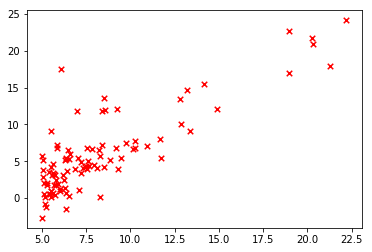

In [183]:
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=4)

In [141]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    sqErr = np.square(h-y)
    J = 1/(2*m)*np.sum(sqErr)
    
    return J

In [144]:
theta = [[0],[0]]
computeCost(X, y, theta)

32.072733877455676

In [168]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros((num_iters, 1))
    
    for i in range(0,num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)

Theta is: [-3.63029144  1.16636235]


(0, 1500)

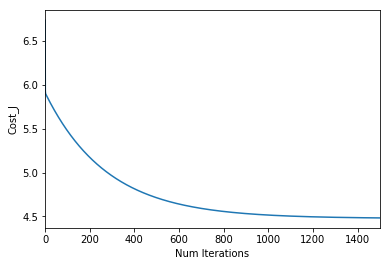

In [194]:
# using gradient descent to calcualte the value of theta
initial_theta = np.zeros((2,1))
theta, Cost_J = gradientDescent(X, y, initial_theta, num_iters=1500)
print('Theta is: {}'.format(theta.ravel()))

plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Num Iterations')
plt.xlim(0, 1500)

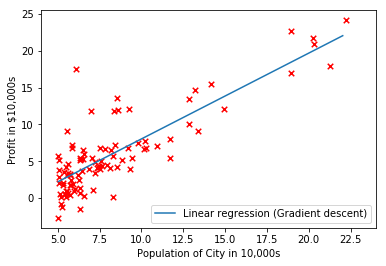

In [193]:
xx = np.arange(np.min(X[:, 1]), np.max(X[:, 1]))
yy = theta[0] + theta[1] * xx

# Plot
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);